# Занятие №12

## Наивная байесовская классификация
Набор моделей, которые предлагают быстрые и простые алгоритмы классификации
## Гауссовский наивный байесовский классификатор
Допущение состоит в том, что данные всех категорий взяты из простого нормального распределения

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


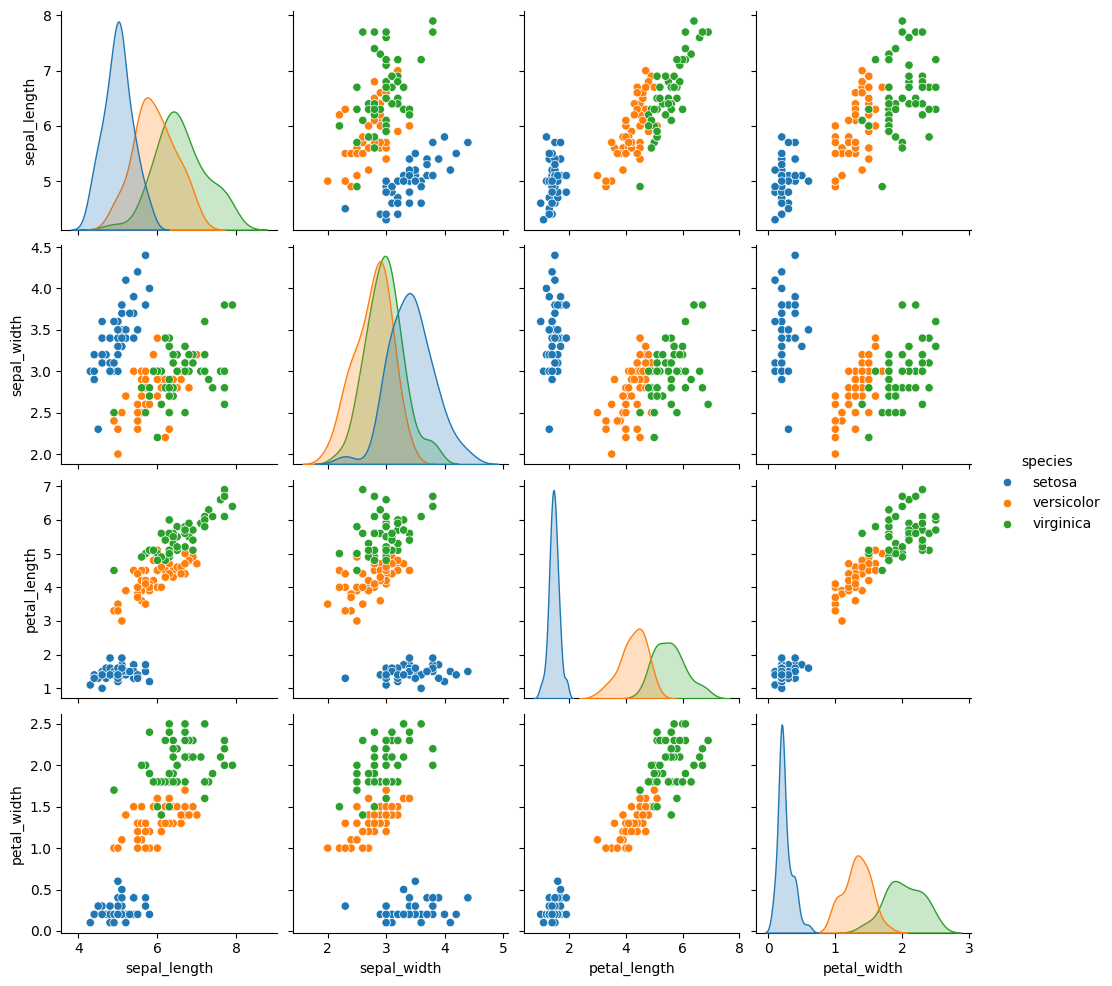

In [8]:
iris = sns.load_dataset("iris")
print(iris.head())

sns.pairplot(iris, hue="species")
plt.show()

   sepal_length  petal_length species
0           5.1           1.4  setosa
1           4.9           1.4  setosa
2           4.7           1.3  setosa
3           4.6           1.5  setosa
4           5.0           1.4  setosa
(150, 3)
(100, 3)
[5.006 1.462]
[0.121764 0.029556]
[5.936 4.26 ]
[0.261104 0.2164  ]
   sepal_length  petal_length species
0      4.300000           1.0  setosa
1      4.327273           1.0  setosa
2      4.354545           1.0  setosa
3      4.381818           1.0  setosa
4      4.409091           1.0  setosa


C:\Users\Володя\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


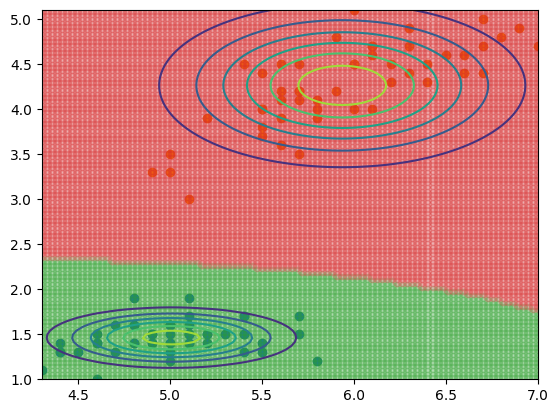

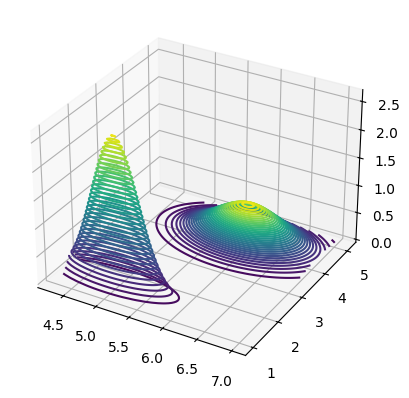

In [9]:
iris = sns.load_dataset("iris")
# print(iris.head())

# sns.pairplot(iris, hue="species")

data = iris[["sepal_length", "petal_length", "species"]]
print(data.head())
print(data.shape)
# setosa versicolor

data_df = data[(data["species"] == "setosa") | (data["species"] == "versicolor")]
print(data_df.shape)
# sns.pairplot(data_df, hue="species")
X = data_df[["sepal_length", "petal_length"]]
y = data_df[["species"]]
model = GaussianNB()
model.fit(X, y)
print(model.theta_[0])
print(model.var_[0])
print(model.theta_[1])
print(model.var_[1])

data_df_setosa = data_df[data_df["species"] == "setosa"]
data_df_versicolor = data_df[data_df["species"] == "versicolor"]

plt.scatter(data_df_setosa["sepal_length"], data_df_setosa["petal_length"])
plt.scatter(data_df_versicolor["sepal_length"], data_df_versicolor["petal_length"])

x1_p = np.linspace(min(data_df["sepal_length"]), max(data_df["sepal_length"]), 100)
x2_p = np.linspace(min(data_df["petal_length"]), max(data_df["petal_length"]), 100)

X1_p, X2_p = np.meshgrid(x1_p, x2_p)
X_p = pd.DataFrame(
    np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=["sepal_length", "petal_length"]
)

y_p = model.predict(X_p)

X_p["species"] = y_p

X_p_setosa = X_p[X_p["species"] == "setosa"]
X_p_versicolor = X_p[X_p["species"] == "versicolor"]

print(X_p.head())

plt.scatter(X_p_setosa["sepal_length"], X_p_setosa["petal_length"], alpha=0.2)
plt.scatter(X_p_versicolor["sepal_length"], X_p_versicolor["petal_length"], alpha=0.2)

# Для кругов
theta0 = model.theta_[0]
var0 = model.var_[0]
theta1 = model.theta_[1]
var1 = model.var_[1]


z1 = (
    1
    / (2 * np.pi * (var0[0] * var0[1]) ** 0.5)
    * np.exp(
        -0.5 * ((X1_p - theta0[0]) ** 2 / var0[0] + (X2_p - theta0[1]) ** 2 / var0[1])
    )
)
plt.contour(X1_p, X2_p, z1)
z2 = (
    1
    / (2 * np.pi * (var1[0] * var1[1]) ** 0.5)
    * np.exp(
        -0.5 * ((X1_p - theta1[0]) ** 2 / var1[0] + (X2_p - theta1[1]) ** 2 / var1[1])
    )
)
plt.contour(X1_p, X2_p, z2)


fig = plt.figure()
ax = plt.axes(projection="3d")
ax.contour3D(X1_p, X2_p, z1, 40)
ax.contour3D(X1_p, X2_p, z2, 40)


plt.show()

   sepal_length  petal_length species
0           5.1           1.4  setosa
1           4.9           1.4  setosa
2           4.7           1.3  setosa
3           4.6           1.5  setosa
4           5.0           1.4  setosa
(150, 3)
(100, 3)
[5.006 1.462]
[0.121764 0.029556]
[6.588 5.552]
[0.396256 0.298496]
   sepal_length  petal_length species
0      4.300000           1.0  setosa
1      4.336364           1.0  setosa
2      4.372727           1.0  setosa
3      4.409091           1.0  setosa
4      4.445455           1.0  setosa


C:\Users\Володя\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


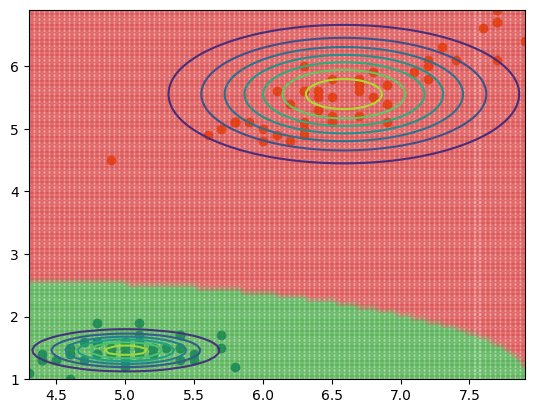

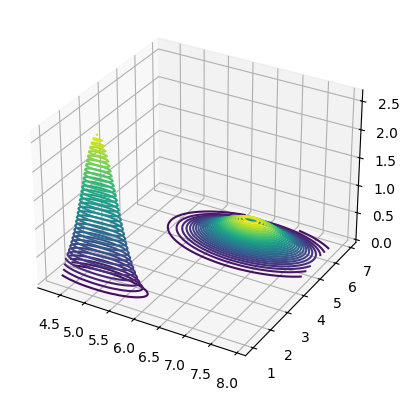

In [10]:
iris = sns.load_dataset("iris")
# print(iris.head())

# sns.pairplot(iris, hue="species")

data = iris[["sepal_length", "petal_length", "species"]]
print(data.head())
print(data.shape)

# setosa virginica

data_df = data[(data["species"] == "setosa") | (data["species"] == "virginica")]
print(data_df.shape)
# sns.pairplot(data_df, hue="species")
X = data_df[["sepal_length", "petal_length"]]
y = data_df[["species"]]
model = GaussianNB()
model.fit(X, y)
print(model.theta_[0])
print(model.var_[0])
print(model.theta_[1])
print(model.var_[1])

data_df_setosa = data_df[data_df["species"] == "setosa"]
data_df_virginica = data_df[data_df["species"] == "virginica"]

plt.scatter(data_df_setosa["sepal_length"], data_df_setosa["petal_length"])
plt.scatter(data_df_virginica["sepal_length"], data_df_virginica["petal_length"])

x1_p = np.linspace(min(data_df["sepal_length"]), max(data_df["sepal_length"]), 100)
x2_p = np.linspace(min(data_df["petal_length"]), max(data_df["petal_length"]), 100)

X1_p, X2_p = np.meshgrid(x1_p, x2_p)
X_p = pd.DataFrame(
    np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=["sepal_length", "petal_length"]
)

y_p = model.predict(X_p)

X_p["species"] = y_p

X_p_setosa = X_p[X_p["species"] == "setosa"]
X_p_virginica = X_p[X_p["species"] == "virginica"]

print(X_p.head())

plt.scatter(X_p_setosa["sepal_length"], X_p_setosa["petal_length"], alpha=0.2)
plt.scatter(X_p_virginica["sepal_length"], X_p_virginica["petal_length"], alpha=0.2)

# Для кругов
theta0 = model.theta_[0]
var0 = model.var_[0]
theta1 = model.theta_[1]
var1 = model.var_[1]


z1 = (
    1
    / (2 * np.pi * (var0[0] * var0[1]) ** 0.5)
    * np.exp(
        -0.5 * ((X1_p - theta0[0]) ** 2 / var0[0] + (X2_p - theta0[1]) ** 2 / var0[1])
    )
)
plt.contour(X1_p, X2_p, z1)
z2 = (
    1
    / (2 * np.pi * (var1[0] * var1[1]) ** 0.5)
    * np.exp(
        -0.5 * ((X1_p - theta1[0]) ** 2 / var1[0] + (X2_p - theta1[1]) ** 2 / var1[1])
    )
)
plt.contour(X1_p, X2_p, z2)


fig = plt.figure()
ax = plt.axes(projection="3d")
ax.contour3D(X1_p, X2_p, z1, 40)
ax.contour3D(X1_p, X2_p, z2, 40)


plt.show()

   sepal_length  petal_length species
0           5.1           1.4  setosa
1           4.9           1.4  setosa
2           4.7           1.3  setosa
3           4.6           1.5  setosa
4           5.0           1.4  setosa
(150, 3)
(100, 3)
[5.936 4.26 ]
[0.261104 0.2164  ]
[6.588 5.552]
[0.396256 0.298496]
   sepal_length  petal_length     species
0      4.900000           3.0  versicolor
1      4.930303           3.0  versicolor
2      4.960606           3.0  versicolor
3      4.990909           3.0  versicolor
4      5.021212           3.0  versicolor


C:\Users\Володя\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


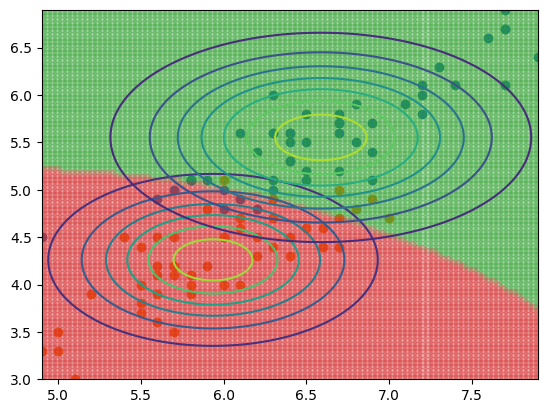

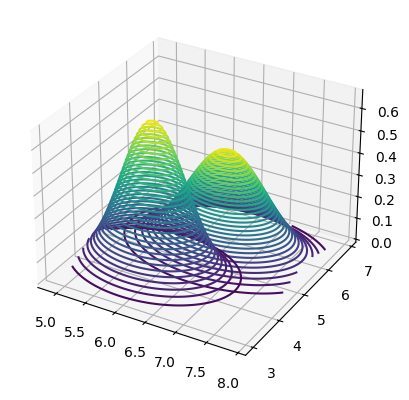

In [11]:
iris = sns.load_dataset("iris")
# print(iris.head())

# sns.pairplot(iris, hue="species")

data = iris[["sepal_length", "petal_length", "species"]]
print(data.head())
print(data.shape)
# virginica versicolor

data_df = data[(data["species"] == "virginica") | (data["species"] == "versicolor")]
print(data_df.shape)
# sns.pairplot(data_df, hue="species")
X = data_df[["sepal_length", "petal_length"]]
y = data_df[["species"]]
model = GaussianNB()
model.fit(X, y)
print(model.theta_[0])
print(model.var_[0])
print(model.theta_[1])
print(model.var_[1])

data_df_virginica = data_df[data_df["species"] == "virginica"]
data_df_versicolor = data_df[data_df["species"] == "versicolor"]

plt.scatter(data_df_virginica["sepal_length"], data_df_virginica["petal_length"])
plt.scatter(data_df_versicolor["sepal_length"], data_df_versicolor["petal_length"])

x1_p = np.linspace(min(data_df["sepal_length"]), max(data_df["sepal_length"]), 100)
x2_p = np.linspace(min(data_df["petal_length"]), max(data_df["petal_length"]), 100)

X1_p, X2_p = np.meshgrid(x1_p, x2_p)
X_p = pd.DataFrame(
    np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=["sepal_length", "petal_length"]
)

y_p = model.predict(X_p)

X_p["species"] = y_p

X_p_virginica = X_p[X_p["species"] == "virginica"]
X_p_versicolor = X_p[X_p["species"] == "versicolor"]

print(X_p.head())

plt.scatter(X_p_virginica["sepal_length"], X_p_virginica["petal_length"], alpha=0.2)
plt.scatter(X_p_versicolor["sepal_length"], X_p_versicolor["petal_length"], alpha=0.2)

# Для кругов
theta0 = model.theta_[0]
var0 = model.var_[0]
theta1 = model.theta_[1]
var1 = model.var_[1]


z1 = (
    1
    / (2 * np.pi * (var0[0] * var0[1]) ** 0.5)
    * np.exp(
        -0.5 * ((X1_p - theta0[0]) ** 2 / var0[0] + (X2_p - theta0[1]) ** 2 / var0[1])
    )
)
plt.contour(X1_p, X2_p, z1)
z2 = (
    1
    / (2 * np.pi * (var1[0] * var1[1]) ** 0.5)
    * np.exp(
        -0.5 * ((X1_p - theta1[0]) ** 2 / var1[0] + (X2_p - theta1[1]) ** 2 / var1[1])
    )
)
plt.contour(X1_p, X2_p, z2)


fig = plt.figure()
ax = plt.axes(projection="3d")
ax.contour3D(X1_p, X2_p, z1, 40)
ax.contour3D(X1_p, X2_p, z2, 40)


plt.show()